## RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song)

Il Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) contiene 7.356 file (dimensione totale: 24,8 GB). Il database contiene 24 attori professionisti (12 femmine, 12 maschi), che vocalizzano due affermazioni lessicalmente abbinate con un accento nordamericano neutro. Il discorso(Speech) include espressioni calme, felici, tristi, arrabbiate, paurose, sorprese e disgustate, e il canto(Song) contiene emozioni calme, felici, tristi, arrabbiate e paurose. Ogni espressione è prodotta a due livelli di intensità emotiva (normale, forte), con un'espressione neutra aggiuntiva. Tutte le condizioni sono disponibili in tre formati di modalità: solo audio (16 bit, 48kHz .wav), audio-video (720p H.264, AAC 48kHz, .mp4) e solo video (senza audio). Nota, non ci sono file di canzoni per Actor_18.

# Premessa
Prima di eseguire il seguente codice assicurarsi di aver preparato il dataset utilizzando il file **Dataset Creation.ipynb**.

# Import moduli

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataset = pd.read_csv('dataset.csv', index_col=False)

In [12]:
dataset.head(6)

,Path,Emotions,Emotional_intensity,Statement,Actor,Gender,Chroma_1,MelSpectrogram_1,MFCC_1,SpectralContrast_1,Tonnetz_1
0,C:\Users\elefa\OneDrive - Alma Mater Studiorum...,neutral,normal,Kids are talking by the door,1,male,[[0.519457 0.66514665 0.85075617 ... 0.41462...,[[2.8260230e-10 2.8998923e-10 2.8759436e-10 .....,[[-857.35706 0. 0. ... 0. ...,[[ 0.26447873 0.93009197 4.4629296 ... 4.6...,[[-0.05962598 -0.03885717 0.05462286 -0.04998...
1,C:\Users\elefa\OneDrive - Alma Mater Studiorum...,neutral,normal,Kids are talking by the door,1,male,[[0.85675573 1. 0.9175831 ... 0.74534...,[[2.59690358e-09 5.20559285e-09 4.17408819e-09...,[[-864.93823 0. 0. ... 0. ...,[[ 6.86260195 6.41452357 12.04297335 ... 13.1...,[[-0.1108627 0.05873807 0.05644629 -0.11206...
2,C:\Users\elefa\OneDrive - Alma Mater Studiorum...,neutral,normal,Dogs are sitting by the door,1,male,[[0.88264173 0.8331756 0.83870983 ... 0.81316...,[[1.9769286e-07 1.6913484e-06 9.0031261e-07 .....,[[-8.49841370e+02 8.88794613e+00 8.69990921e...,[[15.874802 10.32708963 9.38045575 13.05823...,[[-0.04889503 0.05623052 0.00572425 -0.10297...
3,C:\Users\elefa\OneDrive - Alma Mater Studiorum...,neutral,normal,Dogs are sitting by the door,1,male,[[0.6358991 0.6370393 0.68539524 ... 0.76965...,[[1.33240164e-07 3.51791073e-07 1.75174918e-07...,[[-8.3864246e+02 6.9663486e+00 1.2958703e+00...,[[14.04213807 12.52030388 13.94151312 13.73962...,[[-3.42374388e-02 6.79084859e-02 3.06210667e...
4,C:\Users\elefa\OneDrive - Alma Mater Studiorum...,calm,normal,Kids are talking by the door,1,male,[[0.8608093 0.89238214 0.9467261 ... 0.67213...,[[2.36003643e-08 9.92062610e-08 3.28423617e-08...,[[-9.0457202e+02 3.5394292e+00 3.5027733e+00...,[[16.04239893 9.52163772 12.57930754 ... 13.6...,[[-3.46336684e-02 -3.09409816e-03 -2.77886987e...
5,C:\Users\elefa\OneDrive - Alma Mater Studiorum...,calm,normal,Kids are talking by the door,1,male,[[0.90533626 0.9914528 0.897747 ... 1. ...,[[2.19443930e-09 4.33507097e-09 2.12485984e-09...,[[-874.6505 0. 0. ... ...,[[ 7.33957378 9.40383849 14.89895876 ... 11.4...,[[-2.28958196e-02 1.05094429e-02 3.03208828e...


# Analisi variabili del datset
- **Path**: il percorso univoco al file audio (usato per distinguere tutti i file audio);
- **Emotions**: emozione usata;
- **Emotional_intensity**: enfasi 
- **Statement**: frase pronunciata;
- **Actor**: numero attore;
- **Gender**: sesso attore;
- **Chroma_x**: funzionalità potenti per l'analisi della musica, infatti le caratteristiche cromatiche sono molto autentiche per catturare le caratteristiche armoniche e melodiche della musica e dello strumento;
- **MelSpectrogram_x**: input dello spettrogramma mappato direttamente sulla funzione di base Mel, questa rappresentazione dello spettrogramma aumenta la chiarezza uditiva del sistema;
- **MFCC_x**: è la caratteristica spettrale più utilizzata nel riconoscimento delle emozioni vocali, è una caratteristica vantaggiosa per raccogliere benefici dall'audio grezzo. Funziona anche in modo molto efficace nel rumore; il sistema uditivo umano non è lineare; pertanto, MFCC utilizza la scala Mel;
- **SpectralContrast_x**: viene stimata l'energia media di un suono e il valore di contrasto elevato è evidente e il valore di contrasto basso corrisponde al rumore a banda larga;
- **Tonnetz_x**: le caratteristiche di Tonnetz funzionano allo stesso modo come il cromatogramma, è anche correlato all'armonia e alla classe del tono.

Come si può notare anche dalla cella qui sotto, il numero di variabili è 177 mentre le istanze totali sono 1440.

In [13]:
dataset.shape

(1440, 11)

In [14]:
target = "Emotions"

In [15]:
dataset["Emotions"].value_counts()

calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: Emotions, dtype: int64

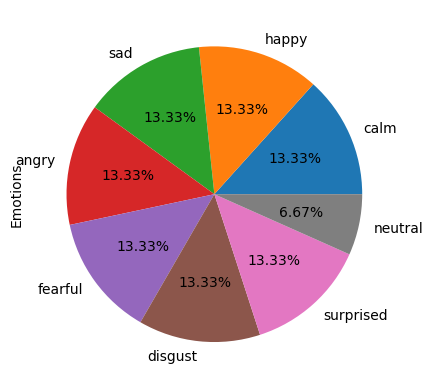

In [16]:
dataset["Emotions"].value_counts().plot.pie(autopct="%.2f%%");

Analisi dei dati con distribuzioni, medie, stddev, percentili, numero valori distinti delle feature.

In [17]:
dataset.iloc[:, :].describe()
print(dataset.columns)


Index(['Path', 'Emotions', 'Emotional_intensity', 'Statement', 'Actor',
       'Gender', 'Chroma_1', 'MelSpectrogram_1', 'MFCC_1',
       'SpectralContrast_1', 'Tonnetz_1'],
      dtype='object')


In [18]:
dataset.pivot_table(index="Path", columns="Emotions", values=["MFCC_2", "MFCC_3", "MFCC_4"]).plot.hist(bins=40, stacked=True, figsize=(12, 6));

KeyError: 'MFCC_2'

In [ ]:
dataset.pivot_table(index="Path", values=["MFCC_2", "MFCC_3", "MFCC_4"]).plot.hist(bins=40, stacked=True, figsize=(12, 6))

Procediamo preparando i dati per il nostro modello:

Per prima cosa eliminiamo tutte le colonne che non ci servono(not_features) e tutte le istanze, o righe, dove vi è almeno un valore NaN.

A seguire, prima di procedere all'elaborazione dei dati eliminiamo dal dataset le feature non ritenute rilevanti:
- Path, usato per distinguere i file audio, risulta ridondante in quanto è già presente un indice;
- Emotional_intensity, per il momento non la prendiamo in considerazione;
- Statement, il modello deve essere in grado di riconoscere l'emozione indipendentemente dalla frase pronunciata;
- Gender, lo si può dedurre dal numero dell'attore, uomo se dispari, donna se pari.

In [ ]:
not_features = ["Path", "Emotional_intensity", "Statement", "Gender"]
features_data = dataset.drop(columns=not_features)
features_data

In [10]:
features_data.dropna(inplace=True)

NameError: name 'features_data' is not defined

In [11]:
features_data.shape

NameError: name 'features_data' is not defined

- Non ci sono valori NaN

In [12]:
for col in range(len(features_data.columns.to_list())-1):
    separator = "----------------------------------\n"
    print(separator + f'{features_data.columns.to_list()[col].upper()}\n')
    print(features_data.iloc[:, col].value_counts())

NameError: name 'features_data' is not defined

## Elaborazione dei dati

In questa fase seguirà un'analisi più approfondita dei dati: standardizzazione, eliminazione feature meno rilevanti con regolarizzazione L1, discretizzazione e binarizzazione delle feature, analisi tramite modelli.

Modello di classificazione lineare con due feature
Un classificatore a due classi lineare è definito da un iperpiano che separa lo spazio delle variabili in due semispazi
la classe prevista per un'osservazione (un punto) dipende dal semispazio in cui si trova
Se consideriamo uno spazio di due variabili (un piano), questo significa in pratica tracciare una retta che separi una classe dall'altra.

Selezioniamo i dati su cui lavorare:
- la variabile y da predire è la classe: Emotins;
- le variabili X sono: le varie features (Chroma, MelSpectrogram, MFCC, Spectral_contrast, Tonnetz);

Suddividiamo i dati in un training set e in un test set nel seguente modo:
- il training set è composto dai 20 attori rimanenti (10 uomini, 10 donne)
- il test set è composto da 4 attori(2 uomini, 2 donne)

Se si vogliono scegliere gli attori in modo casuale utilizzare il seguente codice:

    import random

    rnd = []
    while(len(rnd)!=4):
        for x in range(2):
            rnd.append(random.randrange(2, 25, 2)) #genera i pari
            rnd.append(random.randrange(2, 25, 2) - 1) #genera i dispari
        actor_list = []
        [actor_list.append(x) for x in rnd if x not in actor_list] #controllo non ci siano duplicati

    len(actor_list), actor_list

In [13]:
actor_list = [1, 12, 7, 24]

In [14]:
test_set = features_data.loc[features_data['Actor'].isin(actor_list)]

NameError: name 'features_data' is not defined

In [15]:
test_set

NameError: name 'test_set' is not defined

In [16]:
training_set = features_data.drop(test_set.index)

NameError: name 'features_data' is not defined

In [17]:
training_set

NameError: name 'training_set' is not defined

## Cross validation

Creiamo una funzione che prenda in input un modello, ed esegua la *cross-validation*, salvando in un array **accuracy** e **f1-score**; che useremo poi per realizzare un *box-plot* col quale confronteremo i vari modelli.

In [18]:
training_actors = training_set['Actor']
training_actors = training_actors.unique()

NameError: name 'training_set' is not defined

In [19]:
print(training_actors)

NameError: name 'training_actors' is not defined

In [20]:
training_actors_m = []
training_actors_f = []
for actor in training_actors:
    if (actor%2 == 0):
        training_actors_f.append(actor)
    else:
        training_actors_m.append(actor)

NameError: name 'training_actors' is not defined

In [28]:
!pip install xgboost==1.1.0
!pip install pydub



- importiamo tutti i modelli che decidiamo di usare

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#!pip install xgboost==1.1.0
#se non installato de-commentare il comando precedente ed eseguirlo in una cella separata
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#ELE
import librosa
import numpy as np
from pydub import AudioSegment
from pydub.effects import speedup

ModuleNotFoundError: No module named 'pydub'

- Cross-fold validation con 10 fold (ciascuono composto da 2 attori, 1 maschio e 1 femmina)

In [22]:
accuracy = []
f1 = []

In [23]:
def cross_validation(model):
    model_accuracy = []
    model_f1 = []
    for i in range(10):
        m = training_actors_m[i]
        f = training_actors_f[i]

        cross_test_set = training_set.loc[training_set['Actor'].isin([m, f])]
        cross_training_set = training_set.drop(cross_test_set.index)

        y_train = cross_training_set["Emotions"]
        X2d_train = cross_training_set[dataset.columns[6:]]
        y_test = cross_test_set["Emotions"]
        X2d_test = cross_test_set[dataset.columns[6:]]

        # fit the classifier
        model.fit(X2d_train, y_train)
        # compute the score and record it
        model_accuracy.append(model.score(X2d_test, y_test))
        y_pred = model.predict(X2d_test)
        model_f1.append(f1_score(y_test, y_pred, average="macro"))
        
    accuracy.append(model_accuracy)
    f1.append(model_f1);

In [24]:
# Carica il file audio
audio_file, sr = librosa.load('audio_file.wav')

# Effettua uno shift di tonalità di 5 semitoni
pitch_shifted_audio = librosa.effects.pitch_shift(audio_file, sr, n_steps=5)

# Salva il file audio modificato
librosa.output.write_wav('audio_file_pitch_shifted.wav', pitch_shifted_audio, sr)

# Carica il file audio
audio_file = AudioSegment.from_wav('audio_file.wav')

# Effettua un'accelerazione del 10%
accelerated_audio = speedup(audio_file, playback_speed=1.1)

# Salva il file audio modificato
accelerated_audio.export('audio_file_accelerated.wav', format='wav')

NameError: name 'librosa' is not defined

## Random forest
E' un algoritmo di tipo bagging, dove vengono creati numerosi alberi decisionali in parallelo, ognuno da un sottoinsieme del dataset di training in generale non disgiunto dagli altri.

In [27]:
skf = StratifiedKFold(5, shuffle=True, random_state=42)

In [28]:
cross_validation(RandomForestClassifier(max_samples=0.9, n_estimators=200, max_depth=None, n_jobs=-1, random_state=42))

ValueError: could not convert string to float: '[[0.         0.         0.         ... 0.         0.         0.        ]\n [0.         0.         0.         ... 0.         0.         0.        ]\n [0.         0.         0.         ... 0.         0.         0.        ]\n ...\n [0.9854297  0.8639068  0.916624   ... 0.90642715 0.89333993 0.99542195]\n [0.99343574 0.89872456 0.992993   ... 0.921333   0.95282143 1.        ]\n [0.88048005 0.85860443 0.9309826  ... 0.8576296  0.97748053 1.        ]]'

## Extreme gradient boosting (XGBoost) 
algoritmo che inizia con un modello a previsone costante, per poi sommare ad ogni iterazione un nuovo modello al precedente; dove ogni albero aggiunto è addestrato dal dataset degli errori residui del precedente.

In [ ]:
cross_validation(XGBClassifier(objective='binary:logistic', reg_alpha=0.5, reg_lambda=1.0, max_samples=0.9, n_estimators=200, random_state=42))

## Gradient boosting
Un insieme additivo di un modello base il cui errore viene corretto in successive iterazioni (o fasi) mediante l'aggiunta di alberi di regressione che correggono i residui (l'errore della fase precedente).

In [29]:
cross_validation(GradientBoostingClassifier(n_estimators=200, max_features=2, max_depth=None, random_state=42))

NameError: name 'GradientBoostingClassifier' is not defined

## Regressione Logistica
Algoritmo grazie al quale possiamo introdurre la regolarizzazione al fine di verificare quali siano le features più e meno significative. Qui in seguito è riportata una breve descrizione di questo algoritmo presa dal laboratorio sulla classificazione:

La regressione logistica è un modello di classificazione binaria basato sulla regressione lineare
Sia data una variabile y pari a 1 per gli esempi di una classe (positiva) e -1 per quelli dell'altra (negativa), si minimizza la funzione

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mi>n</mi>
  </munderover>
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>+</mo>
  <mi>exp</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mo>&#x2212;</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <msubsup>
    <mi>X</mi>
    <mi>i</mi>
    <mi>T</mi>
  </msubsup>
  <mi>w</mi>
  <mo>+</mo>
  <mi>c</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math

- solver indica quale implementazione usare tra diverse disponibili per il training, "saga" è l'unica a supportare tutte le opzioni per la regolarizzazione.
- class_weight indica il peso da dare a ciascuna classe in fase di training, nel nostro caso sappiamo dall'analisi sui dati che "neutral" copre il 6,67% delle istanze mentre ciascuna delle altre emozioni il 13,33%. Proviamo quindi a pesare 1:2 le due classi.

In [30]:
cross_validation(Pipeline([
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),
    ("logregr", LogisticRegression(solver="saga", random_state=42, C=0.001, class_weight={'neutral': 2, 'calm': 1, 'happy': 1, 'sad': 1, 'angry': 1, 'fearful': 1, 'disgust': 1, 'surprised': 1}))
]))

NameError: name 'Pipeline' is not defined

## Multi-layer Perceptron classifier (MLP)
Questo modello ottimizza la funzione di perdita logaritmica utilizzando LBFGS o la discesa del gradiente stocastico; è una rete neurale artificiale feedforward che genera un insieme di output da un insieme di input. Un MLP è caratterizzato da diversi livelli di nodi di input collegati come un grafico diretto tra i livelli di input e output. MLP utilizza la retropropagazione per addestrare la rete.

In [31]:
cross_validation(MLPClassifier(random_state=42, max_iter=300))

NameError: name 'MLPClassifier' is not defined

## C-Support Vector Classification (SVC)
Un algoritmo di apprendimento automatico supervisionato tipicamente utilizzato per attività di classificazione. SVC funziona mappando i punti dati in uno spazio ad alta dimensione e quindi trovando l'iperpiano ottimale che divide i dati in due classi.
Il supporto multiclasse è gestito secondo uno schema one-vs-one.

In [32]:
cross_validation(Pipeline([
    ('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))
]) )

NameError: name 'Pipeline' is not defined

In [33]:
avg_accuracy = []
for i in range(len(accuracy)):
    avg_accuracy.append(sum(accuracy[i]) / len(accuracy[i]))

NameError: name 'accuracy' is not defined

In [34]:
avg_accuracy

[]

In [35]:
avg_f1 = []
for i in range(len(f1)):
    avg_f1.append(sum(f1[i]) / len(f1[i]))

In [36]:
avg_f1

[0.3382122745870729,
 0.3637607325293168,
 0.32896422126911834,
 0.3164566590198106,
 0.327300518447278,
 0.3042689597193142]

In [37]:
models = ['Random_forest', 'XGBoost', 'Gradient_Boosting', 'Regressione_Logistica', 'MLP', 'SVC']

- Realizziamo un *boxplot* per ciascun modello, al fine di avere un riscontro "visivo" su quale sia il migliore.

In [38]:
# Creazione dataframe per l'accuracy
accuracy_df = pd.DataFrame()
for i in range(len(models)):
    # Pandas dataframe
    df = pd.DataFrame({models[i]: accuracy[i]})   
    accuracy_df = pd.concat([accuracy_df, df], axis=1)
    
# Creazione dataframe per gli f1-score
plt.rcParams["figure.figsize"] = [14, 6]
f1_df = pd.DataFrame()

for i in range(len(models)):
    # Pandas dataframe
    df = pd.DataFrame({models[i]: f1[i]})   
    f1_df = pd.concat([f1_df, df], axis=1)

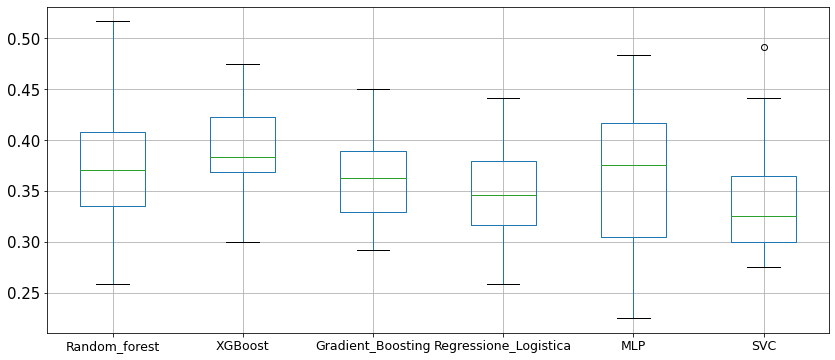

In [49]:
# Plot del dataframe
accuracy_df.boxplot()
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 15)
plt.show()

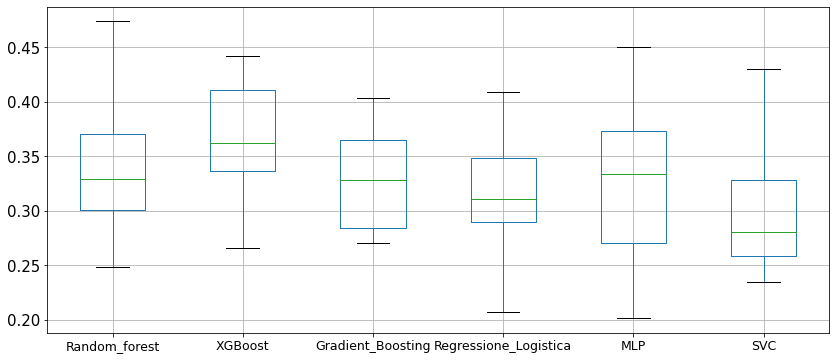

In [45]:
f1_df.boxplot()
plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 15)
plt.show()

Dai risultati ottenuti possiamo constatare che i modelli migliori sembrano essere: **Random Forest** e **Extreme Gradient Boosting**:

- Prepariamo le variabili da utilizzare per addestrare i modelli

In [64]:
y_train = training_set["Emotions"]
X2d_train = training_set[dataset.columns[6:]]
y_test = test_set["Emotions"]
X2d_test = test_set[dataset.columns[6:]]

- Iniziamo con Random Forest

In [65]:
rfm = RandomForestClassifier(max_samples=0.9, n_estimators=200, max_depth=None, n_jobs=-1, random_state=42)

- Proviamo ad utilizzare una grid search

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [67]:
grid = {
    "max_samples": [0.3, 0.6, 0.9],
    "n_estimators": [200, 400, 600]
}

In [68]:
gs = GridSearchCV(rfm, grid, cv=skf, scoring=make_scorer(f1_score, average="macro"))

In [69]:
gs.fit(X2d_train, y_train);

In [70]:
gs.best_params_

{'max_samples': 0.9, 'n_estimators': 200}

In [72]:
model = gs.best_estimator_

In [73]:
model.score(X2d_test, y_test)

0.4625

In [74]:
y_pred = model.predict(X2d_test)

In [75]:
f1_score(y_test, y_pred, average=None)

array([0.62745098, 0.6       , 0.44117647, 0.46153846, 0.41666667,
       0.        , 0.33766234, 0.53333333])

In [76]:
f1_score(y_test, y_pred, average="macro")

0.4272285312726489

- Stampiamo il Classification Report che mostra le principali metriche di classificazione

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.84      0.50      0.63        32
        calm       0.50      0.75      0.60        32
     disgust       0.42      0.47      0.44        32
     fearful       0.60      0.38      0.46        32
       happy       0.38      0.47      0.42        32
     neutral       0.00      0.00      0.00        16
         sad       0.29      0.41      0.34        32
   surprised       0.57      0.50      0.53        32

    accuracy                           0.46       240
   macro avg       0.45      0.43      0.43       240
weighted avg       0.48      0.46      0.46       240



- Calcoliamo la matrice di confusione

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

,angry,calm,disgust,fearful,happy,neutral,sad,surprised
angry,16,0,6,0,7,0,0,3
calm,0,24,0,0,0,0,8,0
disgust,0,5,15,0,7,0,1,4
fearful,2,0,2,12,5,0,8,3
happy,1,2,3,4,15,0,6,1
neutral,0,9,0,0,0,0,7,0
sad,0,7,2,4,3,2,13,1
surprised,0,1,8,0,3,2,2,16


- Ora analizziamo Extreme Gradient Boosting

In [82]:
from xgboost import XGBClassifier

In [83]:
xgbm = XGBClassifier(objective='binary:logistic', reg_alpha=0.5, reg_lambda=1.0, max_samples=0.9, n_estimators=200, random_state=42)

- Anche qui utilizziamo una grid search

In [84]:
grid = {
    "max_samples": [0.3, 0.6, 0.9],
    "n_estimators": [200, 400, 600],
    "reg_alpha": [0.5, 1, 1.5],
    "reg_lambda": [0.5, 1, 1.5]
}

In [85]:
gs = GridSearchCV(xgbm, grid, cv=skf, scoring=make_scorer(f1_score, average="macro"))

In [86]:
gs.fit(X2d_train, y_train);

[10:57:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[10:59:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:00:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:00:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:00:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:03:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:03:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:03:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:06:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:06:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:06:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:09:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:09:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:09:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:12:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:13:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:14:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:14:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:15:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:15:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:15:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:17:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:17:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:17:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:19:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:19:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:19:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:22:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:22:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:25:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:25:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:25:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:27:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:27:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:27:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:29:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:31:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:31:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:31:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:33:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:33:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:33:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:36:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:36:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:36:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:38:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:39:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:39:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_samples } might not be used.

  This may not be accurate due to some parameters are only used in langu

In [87]:
gs.best_params_

{'max_samples': 0.3, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1}

In [88]:
model = gs.best_estimator_

In [89]:
model.score(X2d_test, y_test)

0.525

In [90]:
y_pred = model.predict(X2d_test)

In [91]:
f1_score(y_test, y_pred, average=None)

array([0.66666667, 0.61538462, 0.46666667, 0.48      , 0.43243243,
       0.        , 0.53191489, 0.63492063])

In [92]:
f1_score(y_test, y_pred, average="macro")

0.47849823871100466

- Stampiamo il Classification Report che mostra le principali metriche di classificazione

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      0.59      0.67        32
        calm       0.61      0.62      0.62        32
     disgust       0.50      0.44      0.47        32
     fearful       0.67      0.38      0.48        32
       happy       0.38      0.50      0.43        32
     neutral       0.00      0.00      0.00        16
         sad       0.40      0.78      0.53        32
   surprised       0.65      0.62      0.63        32

    accuracy                           0.53       240
   macro avg       0.50      0.49      0.48       240
weighted avg       0.53      0.53      0.51       240



- Calcoliamo la matrice di confusione

In [94]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

,angry,calm,disgust,fearful,happy,neutral,sad,surprised
angry,19,0,4,0,6,0,0,3
calm,0,20,0,0,0,1,11,0
disgust,2,3,14,1,6,0,2,4
fearful,2,1,0,12,7,0,7,3
happy,0,2,7,2,16,0,5,0
neutral,0,5,0,0,0,0,10,1
sad,0,1,0,2,4,0,25,0
surprised,2,1,3,1,3,0,2,20


Analizzando i dati, possiamo affermare che il modello migliore risulta essere Extrame Gradient Boosting, con precisione 52.5% e f1-score 47.8%